# Stage 2 - API and Web Data Scraping

For this stage, you will practice what you have learned in the APIs and Web Scraping lectures. The idea is to improve your dataset with at least one additional feature.

Deliverables:
- Produce at least one Jupyter Notebook that shows the steps you took and the code you used to acquire and process the new data that you will "merge" with Stage 1 output dataset. Keep in mind that new data must be relevant for your reporting and conclusions. 

Suggested tools: pandas, pathlib, requests, bs4, dotenv, selenium

In [1]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
from urllib.request import urlopen
import lxml.html as lh
import matplotlib.pyplot as plt

In [2]:
#url = 'https://www.bloomberg.com/billionaires/'
#url = 'https://stats.areppim.com/listes/list_billionairesx19xwor.htm'
#url = 'https://www.thetimes.co.uk/article/sunday-times-rich-list-cbxfbprqf'

In [3]:
URL = "https://stats.areppim.com/listes/list_billionairesx19xwor.htm"
web_text = requests.get(URL).text
soup = BeautifulSoup(web_text, 'lxml')
our_table = soup.find_all('div', class_= 'overflowtable')

In [4]:
billionaires2 = str(our_table)

In [5]:
billionaires_split = billionaires2.split('</tr><tr>')

In [6]:
new_billionaires = billionaires_split[1].rstrip('</td>').lstrip('<td>').split('</td><td>')

In [7]:
new_billionaires_clean = []

for item in billionaires_split:
    new_billionaires_clean.append(item.rstrip('</td>').lstrip('<td>').split('</td><td>'))

In [8]:
cols = ['Rank','Name','Total net worth $US Billion','YTD change $US','YTD change %','Country','Industry']

In [9]:
df = pd.DataFrame(new_billionaires_clean, columns=cols)

In [10]:
final_df2 = df.drop([0,501,502,503],axis=0)

In [11]:
# Import the Clean_Forbes.csv
df_the_richests_people = pd.read_csv("/Users/borjauria/IRONHACK/Ironhack-Module-1-Project---The-best-ever-project/data/processed/borjauria_done.csv")

In [12]:
#Merge the two dataframes (Forbes and webscrapping)
df_final = pd.merge(df_the_richests_people, final_df2, on='Name', how='left')

In [13]:
df_final = df_final[['Real Time Position','Name','Age','Industry_x','From','Company','worth','Worth Change']]

In [18]:
df_final.rename(columns={'Industry_x':'Industry'}, inplace=True)

In [21]:
df_final

,Real Time Position,Name,Age,Industry,From,Company,worth,Worth Change
0,1.0,Jeff Bezos,54,Technology,United States,Amazon,112.0,0.0
1,2.0,Bill Gates,62,Technology,United States,Microsoft,90.0,-0.001
2,3.0,Warren Buffett,87,Finance and Investments,United States,Berkshire Hathaway,84.0,-0.002
3,4.0,Bernard Arnault,69,Fashion & Retail,United States,LVMH,72.0,0.0
4,5.0,Mark Zuckerberg,33,Technology,United States,Facebook,71.0,0.0
...,...,...,...,...,...,...,...,...
2181,2134.0,Zhao Zhao,51,Fashion & Retail,China,"fashion, entertainment",1.0,0.0
2182,2134.0,Zhou Zhou,55,Manufacturing,China,electrical equipment,1.0,
2183,1856.0,Zhu Zhu,51,Manufacturing,China,electrical equipment,1.0,0.0
2184,1978.0,Zhuo Zhuo,52,Manufacturing,China,printed circuit boards,1.0,0.0


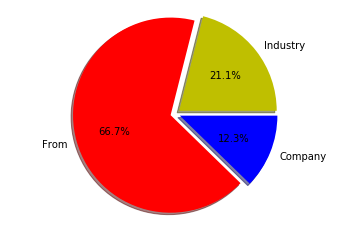

In [29]:
goal_types = 'Industry', 'From', 'Company'

plt.pie(goals, labels = goal_types, colors=colors ,shadow = True, explode = (0.05, 0.05, 0.05), autopct = '%1.1f%%')
plt.axis('equal')

plt.show()